
# 归一化 Normallization

## 为什么要进行数值归一化？
> 下面是肿瘤预测数据的表格，可以看出发现时间和肿瘤大小两个参数的数值不是一个量级，会导致kNN中的样本间的距离被发现时间所主导，这样是明显有失偏颇地
![数值归一化必要性的例子](images/数值归一化必要性的例子.png)

## 数据归一化的原理

> 将所有的数据映射到同一尺度

## 数据归一化最常用的方案:最值归一化

> 最值归一化：把所有的数据映射到0-1之间  
![数值归一化最常用方案之最值归一化](images/数值归一化最常用方案之最值归一化.png)  
最值归一化适用于有明显分界的情况，受outlier(`翻译为极端值、离群值或逸出值`)影响较大。比如收入调查样本中，如果100个人中有一个人是个亿万富翁，其他人都是穷光蛋，那么用最值归一化时其他的人都可以忽略不计了，这是不合理的，即受到了outlier的影响。所以有了更为合理的归一化方案：均值方差归一化 standardization

### 均值方差归一化 standardization
> 把所有的数据归一到均值为0方差为1的分布中。适用于数据分布没有明显的边界，而且有可能存在极端数据值的情况
![均值方差归一化](images/均值方差归一化.png)



In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 下面是一维数组的归一化，简单点

In [3]:
x = np.random.randint(0, 100, size=100) # 100个0~100的随机整数

In [4]:
x

array([58, 19, 66, 40, 28, 26, 11, 49, 52, 58,  0, 57,  1, 88, 35, 25, 88,
       57, 57, 87,  6, 35, 63,  6, 82, 72, 27, 20, 66, 38, 48, 29, 83, 27,
       85, 21, 90, 62,  4, 73, 11, 76, 12, 81, 16, 76, 33,  3, 89, 10, 42,
       92,  3, 12,  1, 25, 45, 78, 35, 37, 63, 98, 19, 86, 95, 87, 46, 97,
       75, 18, 81, 12, 56, 33, 36, 69, 95, 23, 23, 21, 34, 74, 64, 97, 31,
       31,  6, 70, 69, 69, 13, 82, 86, 22, 68, 79, 82, 49, 88, 56])

In [5]:
(x - np.min(x)) / (np.max(x) - np.min(x)) # 最值归一化：将x的所有元素都进行了归一化

array([0.59183673, 0.19387755, 0.67346939, 0.40816327, 0.28571429,
       0.26530612, 0.1122449 , 0.5       , 0.53061224, 0.59183673,
       0.        , 0.58163265, 0.01020408, 0.89795918, 0.35714286,
       0.25510204, 0.89795918, 0.58163265, 0.58163265, 0.8877551 ,
       0.06122449, 0.35714286, 0.64285714, 0.06122449, 0.83673469,
       0.73469388, 0.2755102 , 0.20408163, 0.67346939, 0.3877551 ,
       0.48979592, 0.29591837, 0.84693878, 0.2755102 , 0.86734694,
       0.21428571, 0.91836735, 0.63265306, 0.04081633, 0.74489796,
       0.1122449 , 0.7755102 , 0.12244898, 0.82653061, 0.16326531,
       0.7755102 , 0.33673469, 0.03061224, 0.90816327, 0.10204082,
       0.42857143, 0.93877551, 0.03061224, 0.12244898, 0.01020408,
       0.25510204, 0.45918367, 0.79591837, 0.35714286, 0.37755102,
       0.64285714, 1.        , 0.19387755, 0.87755102, 0.96938776,
       0.8877551 , 0.46938776, 0.98979592, 0.76530612, 0.18367347,
       0.82653061, 0.12244898, 0.57142857, 0.33673469, 0.36734

## 下面是二维数组的归一化，对每一列进行归一化即可

In [6]:
X= np.random.randint(0, 100, (50, 2))

In [8]:
X[:10] # 取出前10个数看下

array([[18, 97],
       [ 9, 30],
       [67, 30],
       [92, 25],
       [82, 71],
       [70,  3],
       [56,  9],
       [89, 11],
       [73, 82],
       [58, 17]])

In [9]:
X[:10, :] # 取出x的前10行

array([[18, 97],
       [ 9, 30],
       [67, 30],
       [92, 25],
       [82, 71],
       [70,  3],
       [56,  9],
       [89, 11],
       [73, 82],
       [58, 17]])

In [23]:
X = np.array(X, dtype=float) # 因为要归一化到0~1，所以数据类型要转换到浮点型

### 下面是对每列进行最值归一化

In [24]:
X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0])) # 第一列归一化

In [25]:
X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1])) # 第二列归一化。n列的话注意要循环一下

In [26]:
X[:10]

array([[0.18367347, 0.97938144],
       [0.09183673, 0.28865979],
       [0.68367347, 0.28865979],
       [0.93877551, 0.2371134 ],
       [0.83673469, 0.71134021],
       [0.71428571, 0.01030928],
       [0.57142857, 0.07216495],
       [0.90816327, 0.09278351],
       [0.74489796, 0.82474227],
       [0.59183673, 0.15463918]])

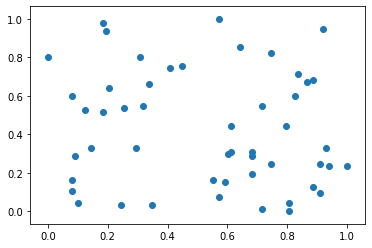

In [28]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()
# 从下面图中可以看到所有的点都被归一到0~1范围内了

In [29]:
np.mean(X[:, 0]) # 接近0.5

0.5293877551020408

In [30]:
np.std(X[:, 0])

0.29875933936388144

In [31]:
np.mean(X[:, 1]) # 接近0.5

0.4288659793814433

In [32]:
np.std(X[:, 1])

0.2943691634305235

In [34]:
np.max(X[:, 0])

1.0

In [35]:
np.min(X[:, 0])

0.0

In [36]:
np.max(X[:, 1])

1.0

In [37]:
np.min(X[:, 1])

0.0

# 均值方差归一化 Standardization
> ![均值方差归一化](images/均值方差归一化.png)

In [58]:
X2 = np.random.randint(0, 100, (50, 2))

In [59]:
X2 = np.array(X2, dtype=float)

In [60]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])  # 第一列的均值方差归一化

In [61]:
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])  # 第二列的均值方差归一化

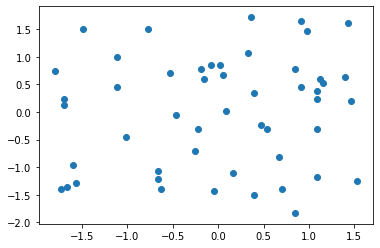

In [62]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()
# 下面图可以看到均值方差归一化并不能让样本的值限制在0~1之间

In [63]:
np.mean(X2[:, 0]) # 无限逼近0

3.9968028886505634e-17

In [64]:
np.std(X2[:, 0]) # 无限逼近1

1.0

In [65]:
np.mean(X2[:, 1]) # 无限逼近0

7.549516567451065e-17

In [66]:
np.std(X2[:, 1]) # 无限逼近1，或者就是1.满足均值是0，方差是1的均值方差归一化的条件

0.9999999999999999